# Set up the repository

In [1]:
if 'google.colab' in str(get_ipython()):
    # Move to the root
    import os
    os.chdir('/content')
    !git clone https://gitlab.com/jemaro/wut/neural-networks/style-transfer
    !cd style-transfer; git pull

# Run the style transfer

style_transfer [INFO]: Start run
INFO:style_transfer:Start run
style_transfer.utils [INFO]: block5_conv2
INFO:style_transfer.utils:block5_conv2
style_transfer.utils [INFO]: {'block': '5', 'layer': 'conv2', 'conv': '2', 'pool': None}
INFO:style_transfer.utils:{'block': '5', 'layer': 'conv2', 'conv': '2', 'pool': None}
style_transfer.utils [INFO]: block5_conv3
INFO:style_transfer.utils:block5_conv3
style_transfer.utils [INFO]: {'block': '5', 'layer': 'conv3', 'conv': '3', 'pool': None}
INFO:style_transfer.utils:{'block': '5', 'layer': 'conv3', 'conv': '3', 'pool': None}
style_transfer.utils [INFO]: block5_conv4
INFO:style_transfer.utils:block5_conv4
style_transfer.utils [INFO]: {'block': '5', 'layer': 'conv4', 'conv': '4', 'pool': None}
INFO:style_transfer.utils:{'block': '5', 'layer': 'conv4', 'conv': '4', 'pool': None}
style_transfer.utils [INFO]: block5_pool
INFO:style_transfer.utils:block5_pool
style_transfer.utils [INFO]: {'block': '5', 'layer': 'pool', 'conv': None, 'pool': 'p'}
IN

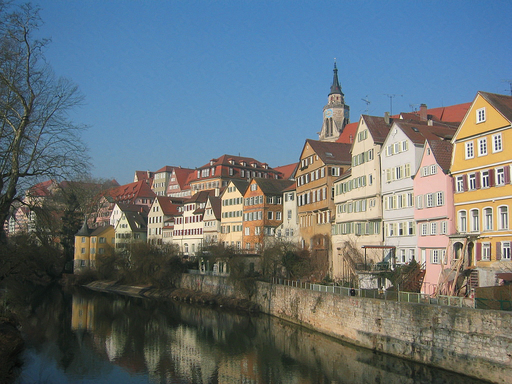

stats (2020-12-16 18:50:48,396): 2.5790,0,4.2510e+08,4.2510e+08,0.0000e+00,2.5790
INFO:stats:2.5790,0,4.2510e+08,4.2510e+08,0.0000e+00,2.5790
style_transfer.style_transfer [ERROR]: Keyboard Interrupt
ERROR:style_transfer.style_transfer:Keyboard Interrupt


KeyboardInterrupt: 

In [2]:
if 'google.colab' in str(get_ipython()):
    # Move to the repository
    import os
    os.chdir('/content/style-transfer')
    OUTPUT_FOLDER='/content/drive/MyDrive/style_transfer'
else:
    from style_transfer.config import OUTPUT_FOLDER

import itertools
import numpy as np
from pathlib import Path
from datetime import datetime

from style_transfer import run_style_transfer
from style_transfer.config import STYLE_FOLDER, CONTENT_FOLDER
from style_transfer._logging import config_logger
from style_transfer.utils import append_codename

logger = config_logger(output_folder=OUTPUT_FOLDER)

logger.info('Start run')

# Define the experiments that will be conducted.
# A run will be conducted with every possible combination of input arguments 
# specified in the the following dictionary and the results ordered in a tree
# like folder structure
experiments = {
    'content_path': CONTENT_FOLDER.iterdir(),
    'style_path': STYLE_FOLDER.iterdir(),
    'content_layers': list(map(append_codename, [
        ['block5_conv2'],
        ['block5_conv3'],
        ['block5_conv4'],
        ['block5_pool'],
        ['block4_conv2'],
        ['block3_conv2'],
        ['block2_conv2'],
        ['block1_conv2'],
        ['block5_conv2', 'block5_conv3'],
        ['block5_conv2', 'block5_conv3', 'block5_conv4'],
        ['block5_conv2', 'block5_conv3', 'block5_conv4', 'block5_pool'],
    ])),
    'style_layers': list(map(append_codename, [
        ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 
         'block5_conv1'],
        ['block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1'],
        ['block3_conv1', 'block4_conv1', 'block5_conv1'],
        ['block4_conv1', 'block5_conv1'],
        ['block5_conv1'],
        ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1'],
        ['block1_conv1', 'block2_conv1', 'block3_conv1'],
        ['block1_conv1', 'block2_conv1'],
        ['block1_conv1'],
        ['block1_conv1', 'block1_conv3', 'block2_conv1', 'block3_conv1', 
         'block4_conv1'],
        ['block1_conv1', 'block1_conv3', 'block1_conv4', 'block2_conv1', 
         'block3_conv1'],
    ])),
    'pre_training': [True, False],
    'learning_rate': [1,2,3,5,7,11,13],
    'beta_1': [0.8, 0.99, 0.11],
    'beta_2': [0.9, 0.99, 0.999, 1],
    'epsilon': [1e-06, 1e-07, 1e-08],
    'amsgrad': [True, False],
    'content_weight': np.logspace(1e5,1e-2,7),
    # 'content_weight': [1e3],
    'style_weight': np.logspace(1e5,1e-2,7),
    # 'style_weight': [1e-2],
    'num_iterations': [1000],
}
logger.info(f'experiments =\n{experiments}')

# Create output folder
output_folder = Path(OUTPUT_FOLDER, datetime.now().strftime('%Y%m%d_%H%M%S'))
output_folder.mkdir(parents=True)

for values in itertools.product(*experiments.values()):
    kwargs = dict(zip(experiments.keys(), values))
    run_folder = output_folder
    # Build run folder and correct kwargs removing the folder names from tuples
    for key, value in kwargs.items():
        Path(run_folder, key).touch()
        if isinstance(value, tuple):
            kwargs[key] = value[1]
            folder = value[0]
        elif isinstance(value, Path):
            folder = value.stem
        elif isinstance(value, float):
            folder = f'{value:.4e}'
        else:
            folder = str(value)
        run_folder = Path(run_folder, folder)
        run_folder.mkdir(parents=True, exist_ok=True)
    logger.info(f'Start run with kwargs = {kwargs}')
    run_style_transfer(
        output_folder=run_folder,
        verbose=False,
        log_images=True,
        **kwargs
        )
            
logger.info('Finished run')